In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [208]:
happiness_report=pd.read_excel('WHR20_DataForFigure2.1.xls')
hdi=pd.read_csv('Human Development Index (HDI).csv')
hief_data=pd.read_csv('HIEF_data.csv')

schooling_years=pd.read_csv('Expected years of schooling (years).csv')
exports_imports=pd.read_csv('Exports and imports (% of GDP).csv')
gender_development=pd.read_csv('Gender Development Index (GDI).csv')
gni_per_capita=pd.read_csv('Gross national income (GNI) per capita (2011 PPP$).csv')
homicide_rate=pd.read_csv('Homicide rate (per 100,000 people).csv')
inequality=pd.read_csv('Inequality-adjusted HDI (IHDI).csv')
internet_users=pd.read_csv('Internet users, total (% of population).csv')
life_exp=pd.read_csv('Life expectancy at birth.csv')
population=pd.read_csv('Population, total (millions).csv')
skilled_labor=pd.read_csv('Skilled labour force (% of labour force).csv')
employment=pd.read_csv('Employment to population ratio (% ages 15 and older).csv')

data_frames=[schooling_years, exports_imports, gender_development, gni_per_capita, homicide_rate, inequality, 
            internet_users, life_exp, population, skilled_labor, employment]

In [209]:
hief_data=hief_data.loc[hief_data['Year']==2013]

In [210]:
def fix_csv(csv):
    csv.reset_index(inplace=True)
    new_headers=csv.iloc[0]
    csv.columns=new_headers
    csv.drop(index=0, inplace=True)
    csv=csv.loc[:, csv.columns.notnull()]
    csv=csv.loc[csv['2013']!='..'] # for some reason this also doesn't work inside the function
    #csv.dropna(axis=0, inplace=True)
    
def clean_columns(csv):
    #can't seem to get this to work in a function - gonna do it manually for now, will try to fix later
    csv=csv.loc[:, csv.columns.notnull()]

In [211]:
fix_csv(schooling_years)
fix_csv(exports_imports)
fix_csv(gender_development)
fix_csv(gni_per_capita)
fix_csv(homicide_rate)
fix_csv(inequality)
fix_csv(internet_users)
fix_csv(life_exp)
fix_csv(population)
fix_csv(skilled_labor)
fix_csv(employment)
fix_csv(hdi)

In [212]:
hdi = hdi.drop(hdi.index[189:])

In [213]:
hdi.fillna('..' , inplace=True)

In [214]:
hdi

,HDI Rank (2018),Country,1990,NaN,1991,NaN,1992,NaN,1993,NaN,1994,NaN,1995,NaN,1996,NaN,1997,NaN,1998,NaN,1999,NaN,2000,NaN,2001,NaN,2002,NaN,2003,NaN,2004,NaN,2005,NaN,2006,NaN,2007,NaN,2008,NaN,2009,NaN,2010,NaN,2011,NaN,2012,NaN,2013,NaN,2014,NaN,2015,NaN,2016,NaN,2017,NaN,2018,NaN
1,170,Afghanistan,0.298,..,0.304,..,0.312,..,0.308,..,0.303,..,0.327,..,0.331,..,0.335,..,0.339,..,0.343,..,0.345,..,0.347,..,0.378,..,0.387,..,0.400,..,0.410,..,0.419,..,0.431,..,0.436,..,0.447,..,0.464,..,0.465,..,0.479,..,0.485,..,0.488,..,0.490,..,0.491,..,0.493,..,0.496,..
2,69,Albania,0.644,..,0.625,..,0.608,..,0.611,..,0.617,..,0.629,..,0.639,..,0.639,..,0.649,..,0.660,..,0.667,..,0.673,..,0.680,..,0.687,..,0.692,..,0.702,..,0.709,..,0.718,..,0.724,..,0.729,..,0.740,..,0.759,..,0.771,..,0.781,..,0.787,..,0.788,..,0.788,..,0.789,..,0.791,..
3,82,Algeria,0.578,..,0.582,..,0.589,..,0.593,..,0.597,..,0.602,..,0.610,..,0.619,..,0.629,..,0.638,..,0.646,..,0.655,..,0.666,..,0.676,..,0.685,..,0.694,..,0.699,..,0.708,..,0.711,..,0.720,..,0.730,..,0.738,..,0.737,..,0.746,..,0.749,..,0.751,..,0.755,..,0.758,..,0.759,..
4,36,Andorra,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,0.759,..,0.767,..,0.780,..,0.820,..,0.826,..,0.819,..,0.829,..,0.829,..,0.831,..,0.830,..,0.828,..,0.827,..,0.849,..,0.846,..,0.853,..,0.850,..,0.854,..,0.852,..,0.857,..
5,149,Angola,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,0.384,..,0.394,..,0.404,..,0.419,..,0.428,..,0.440,..,0.453,..,0.466,..,0.482,..,0.494,..,0.508,..,0.510,..,0.525,..,0.537,..,0.547,..,0.557,..,0.565,..,0.570,..,0.576,..,0.574,..
6,74,Antigua and Barbuda,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,0.773,..,0.779,..,0.784,..,0.783,..,0.776,..,0.772,..,0.764,..,0.767,..,0.767,..,0.767,..,0.770,..,0.772,..,0.774,..,0.776,..
7,48,Argentina,0.707,..,0.714,..,0.719,..,0.725,..,0.729,..,0.731,..,0.738,..,0.746,..,0.752,..,0.763,..,0.770,..,0.775,..,0.770,..,0.775,..,0.775,..,0.777,..,0.801,..,0.806,..,0.810,..,0.810,..,0.818,..,0.823,..,0.823,..,0.824,..,0.825,..,0.828,..,0.828,..,0.832,..,0.830,..
8,81,Armenia,0.633,..,0.629,..,0.585,..,0.590,..,0.600,..,0.604,..,0.614,..,0.625,..,0.637,..,0.644,..,0.649,..,0.653,..,0.663,..,0.672,..,0.681,..,0.694,..,0.708,..,0.724,..,0.727,..,0.724,..,0.729,..,0.733,..,0.737,..,0.743,..,0.746,..,0.748,..,0.751,..,0.758,..,0.760,..
9,6,Australia,0.866,..,0.867,..,0.868,..,0.872,..,0.875,..,0.883,..,0.886,..,0.889,..,0.892,..,0.895,..,0.898,..,0.900,..,0.903,..,0.904,..,0.907,..,0.902,..,0.905,..,0.908,..,0.922,..,0.923,..,0.926,..,0.928,..,0.932,..,0.926,..,0.929,..,0.933,..,0.935,..,0.937,..,0.938,..
10,20,Austria,0.795,..,0.799,..,0.805,..,0.809,..,0.813,..,0.817,..,0.820,..,0.824,..,0.828,..,0.834,..,0.838,..,0.849,..,0.838,..,0.842,..,0.849,..,0.855,..,0.861,..,0.881,..,0.884,..,0.886,..,0.895,..,0.897,..,0.899,..,0.896,..,0.904,..,0.906,..,0.909,..,0.912,..,0.914,..


In [215]:
schooling_years=schooling_years.loc[:, schooling_years.columns.notnull()].loc[schooling_years['2013']!='..'].loc[schooling_years['2018']!='..'][['HDI Rank (2018)', 'Country', '2013', '2018']]
exports_imports=exports_imports.loc[:, exports_imports.columns.notnull()].loc[exports_imports['2013']!='..'].loc[exports_imports['2018']!='..'][['HDI Rank (2018)', 'Country', '2013', '2018']]
gender_development=gender_development.loc[:, gender_development.columns.notnull()].loc[gender_development['2013']!='..'].loc[gender_development['2018']!='..'][['HDI Rank (2018)', 'Country', '2013', '2018']]
gni_per_capita=gni_per_capita.loc[:, gni_per_capita.columns.notnull()].loc[gni_per_capita['2013']!='..'].loc[gni_per_capita['2018']!='..'][['HDI Rank (2018)', 'Country', '2013', '2018']]
homicide_rate=homicide_rate.loc[:, homicide_rate.columns.notnull()].loc[homicide_rate['2013']!='..'].loc[homicide_rate['2017']!='..'][['HDI Rank (2018)', 'Country', '2013', '2017']]
inequality=inequality.loc[:, inequality.columns.notnull()].loc[inequality['2013']!='..'].loc[inequality['2018']!='..'][['HDI Rank (2018)', 'Country', '2013', '2018']]
internet_users=internet_users.loc[:, internet_users.columns.notnull()].loc[internet_users['2013']!='..'].loc[internet_users['2018']!='..'][['HDI Rank (2018)', 'Country', '2013', '2018']]
life_exp=life_exp.loc[:, life_exp.columns.notnull()].loc[life_exp['2013']!='..'].loc[life_exp['2018']!='..'][['HDI Rank (2018)', 'Country', '2013', '2018']]
population=population.loc[:, population.columns.notnull()].loc[population['2013']!='..'].loc[population['2018']!='..'][['HDI Rank (2018)', 'Country', '2013', '2018']]
skilled_labor=skilled_labor.loc[:, skilled_labor.columns.notnull()].loc[skilled_labor['2013']!='..'].loc[skilled_labor['2018']!='..'][['HDI Rank (2018)', 'Country', '2013', '2018']]
employment=employment.loc[:, employment.columns.notnull()].loc[employment['2013']!='..'].loc[employment['2018']!='..'][['HDI Rank (2018)', 'Country', '2013', '2018']]

In [216]:
schooling_years.rename(columns={'2013':'2013sy', '2018':'2018sy'}, inplace=True)
exports_imports.rename(columns={'2013':'2013ei', '2018':'2018ei'}, inplace=True)     
gender_development.rename(columns={'2013':'2013gd', '2018':'2018gd'}, inplace=True)
gni_per_capita.rename(columns={'2013':'2013gni', '2018':'2018gni'}, inplace=True)
inequality.rename(columns={'2013':'2013ineq', '2018':'2018ineq'}, inplace=True)
internet_users.rename(columns={'2013':'2013iu', '2018':'2018iu'}, inplace=True)
life_exp.rename(columns={'2013':'2013le', '2018':'2018le'}, inplace=True)
population.rename(columns={'2013':'2013p', '2018':'2018p'}, inplace=True)
skilled_labor.rename(columns={'2013':'2013sl', '2018':'2018sl'}, inplace=True)
employment.rename(columns={'2013':'2013emp', '2018':'2018emp'}, inplace=True)
homicide_rate.rename(columns={'2013':'2013h', '2017':'2018h'}, inplace=True)
#There is no data for 2018 in homicide_rate so I think it makes the most sense to just use 2017 for 2018

In [217]:
hdi = hdi[['Country', '2013', '2018']]

In [218]:
hdi = hdi.rename(columns={"2013":"Hdi_score_2013", "2018":"Hdi_score_2018"})

In [219]:
hief_data=hief_data[['Country', 'EFindex']]
happiness_report=happiness_report[['Country name', 'Ladder score']]

In [220]:
hief_data = hief_data.rename(columns={"EFindex":"EFIndex_2013"})

In [227]:
## This sorts the countries by alphabetical order, to better align the datasets
hief_data = hief_data.sort_values('Country')

In [228]:
## This resets the index numbering of the dataset by creating an additional column to the left.
hief_data = hief_data.reset_index()

In [229]:
## This deletes the old index column
hief_data = hief_data.drop(columns=['index'])

In [230]:
## Clean
hief_data

,Country,EFIndex_2013
0,Afghanistan,0.763
1,Albania,0.139
2,Algeria,0.372
3,Angola,0.779
4,Argentina,0.158
5,Armenia,0.045
6,Australia,0.276
7,Austria,0.248
8,Azerbaijan,0.122
9,Bahrain,0.582


In [232]:
hdi

,Country,Hdi_score_2013,Hdi_score_2018
1,Afghanistan,0.485,0.496
2,Albania,0.781,0.791
3,Algeria,0.746,0.759
4,Andorra,0.846,0.857
5,Angola,0.547,0.574
6,Antigua and Barbuda,0.767,0.776
7,Argentina,0.824,0.830
8,Armenia,0.743,0.760
9,Australia,0.926,0.938
10,Austria,0.896,0.914


In [233]:
## using 'inner' will merge all matching country names AND remove ALL NaN's
## using 'outer' will merge all matching countries and add additional rows for non-matching ones, resulting in many NaN's
hdi_w_hief=hdi.merge(hief_data, how='outer')

In [235]:
## Scroll to the bottom after index 188 to see a problem
hdi_w_hief

,Country,Hdi_score_2013,Hdi_score_2018,EFIndex_2013
0,Afghanistan,0.485,0.496,0.763
1,Albania,0.781,0.791,0.139
2,Algeria,0.746,0.759,0.372
3,Andorra,0.846,0.857,NaN
4,Angola,0.547,0.574,0.779
5,Antigua and Barbuda,0.767,0.776,NaN
6,Argentina,0.824,0.830,0.158
7,Armenia,0.743,0.760,0.045
8,Australia,0.926,0.938,0.276
9,Austria,0.896,0.914,0.248


In [203]:
hdi_w_hief.isna().sum()

Country            0
Hdi_score_2013    25
Hdi_score_2018    25
index             58
EFIndex_2013      58
dtype: int64

In [204]:
## Alternatively, we could search for "Zimbabwe" and just capture/delete everything after Zimbabwe
## Reason being:  Zimbabwe is ALWAYS last alphabetically in English-language country names
lostnats = hdi_w_hief.iloc[189:]

In [205]:
## Out of the 58 countries that are NaN-ed, 25 of them should NOT be
len(lostnats)

25

In [206]:
## This is all the countries we lost due to naming discrepencies between the two datasets.
## By the looks of it, the only fix is to do it by hand
lostnats

,Country,Hdi_score_2013,Hdi_score_2018,index,EFIndex_2013
189,Bolivia,NaN,NaN,5827.0,0.572
190,Bosnia-Herzegovina,NaN,NaN,1391.0,0.637
191,Cape Verde,NaN,NaN,2037.0,0.442
192,Cote d'Ivoire,NaN,NaN,2450.0,0.731
193,Czech Republic,NaN,NaN,1141.0,0.262
194,Democratic People's Republic of Korea,NaN,NaN,7530.0,0.020
195,Democratic Republic of Congo,NaN,NaN,3117.0,0.700
196,Democratic Republic of Vietnam,NaN,NaN,8307.0,0.263
197,East Timor,NaN,NaN,8589.0,0.802
198,German Federal Republic,NaN,NaN,547.0,0.189


In [ ]:
##  Progress ends here

In [169]:
## This is a temporary copy to show progress so far
hdi_w_hief2 = hdi.merge(hief_data, how='inner')

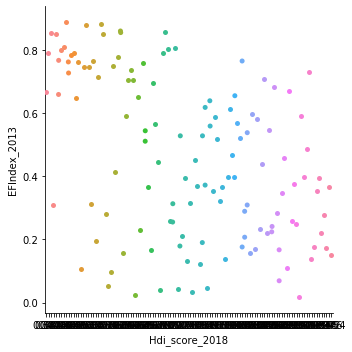

In [170]:
## This is the plot of the aforementioned temp copy
plot = sns.catplot(x='Hdi_score_2018', y='EFIndex_2013', data=hdi_w_hief2)